#1.What is a Time Series?

i).Time series is a sequence of observations recorded at regular time intervals.

---
ii).Time series is any data set where the values are measured at different points in time.

---

iii).A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.


---




### Components of Time Series

**1.Trends**: This refers to the movement of a series to relatively higher or lower values over a long period of time.

**2.Seasonality**: This refers to is a repeating pattern within a fixed time period.

**3.Irregularity**: This is also called noise. Irregularity happens for a short duration and it’s non depleting.

**4.Cyclic:** This is when a series is repeating upward and downward movement. It usually does not have a fixed pattern. It could happen in 6months, then two years later, then 4 years, then 1 year later. These kinds of patterns are much harder to predict.


Other definitions of the same:

**Trend**: A long-term increase or decrease in the data. This can be seen as a slope (is doesn’t have to be linear) roughly going through the data.


---
**Seasonality**: A time series is said to be seasonal when it is affected by seasonal factors (hour of day, week, month, year, etc.). Seasonality can be observed with nice cyclical patterns of fixed frequency


---
**Cyclicity** : A cycle occurs when the data exhibits rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.


---
**Residuals** : Each time series can be decomposed in two parts:
- A ***forecast***, made up of one or several forecasted values.
- ***Residuals***. They are the difference between an observation and its predicted value at each time step.


---
Remember that:

Value of series at time t = Predicted value at time t + Residual at time t





Time series helps us understand past trends so we can forecast and plan for the future.

Hence, it is important to note that in Time Series Analysis, the only known variable is — Time.

These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis

* Pandas has proven very successful as a tool for 
working with Time Series data. 

* This is because Pandas has some in-built datetime functions which makes it easy to work with a Time Series Analysis, and since time is the most important variable we work with here, it makes Pandas a very suitable tool to perform such analysis.

Some of the topics discussed here:


* Time series data structures
* Time-based indexing
* Visualizing time series data
* Seasonality
* Frequencies
* Resampling
* Rolling windows
* Trends

###Decomposition of a time series

Each time series can be thought as a mix between several parts :

 * A trend (upward or downwards movement of the curve on the long term)

* A seasonal component

* Residuals

### Stationarity

***Stationarity*** is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). If the mean of a time-series increases over time, then it’s not stationary.


---



In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time.


---



It does not mean that the series does not change over time, just that the way it changes does not itself change over time.


stationary time series data donot dependent on time

###Transforms used for stationarizing data:

 **a.De-trending**: We remove the underlying trend in the series. This can be done in several ways, depending on the nature of data :
- Indexed data: data measured in currencies are linked to a price index or related to inflation. Dividing the series by this index (ie deflating) element-wise is therefore the solution to de-trend the data.
- Non-indexed data: is it necessary to estimate if the trend is constant, linear or exponential. The first two cases are easy, for the last one it is necessary to estimate a growth rate (inflation or deflation) and apply the same method as for indexed data.


---
**b.Differencing** : Seasonal or cyclical patterns can be removed by substracting periodical values. If the data is 12-month seasonal, substracting the series with a 12-lag difference series will give a “flatter” series.


---

**c.Logging** : in the case where the compound rate in the trend is not due to a price index (ie the series is not measured in a currency), logging can help linearize a series with an exponential trend (recall that log(exp(x)) = x). It does not remove an eventual trend whatsoever, unlike deflation.


#2.How to import Time Series in Python?

In [ ]:

#This parse module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.
from dateutil.parser import parse 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#Used to update the runtime configuration parameters from the defaults  rcParams["figure. figsize"] = [6.4, 4.8] .
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
# Import as Dataframe
#Adding the parse_dates=['date'] argument will make the date column to be parsed as a date field
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 56.1MB 701kB/s
     |████████████████████████████████| 81kB 4.3MB/s 
     |████████████████████████████████| 604kB 9.2MB/s 
     |████████████████████████████████| 3.1MB 17.0MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 296kB 46.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=00331d12c71b3aa0189ca3ee32bc1994d55519a5cf89d1b5d36ac346507b3dad
  Stored in directory: /tmp/pip-ephem-wheel-cache-r0zg12w3/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=fed59650ac9d899d38505236666b5bdacd5417c837cf5c486431522256f5e404
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully unin

In [ ]:
#Without using the parse fields , the data will be as follows:
df1 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
df1.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


#3.Understand the data

In [ ]:
#Check the last 5 items in the data.
df.tail()

,date,value
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


In [ ]:
#Check data types of a column
type(df['value'])

pandas.core.series.Series

In [ ]:
#Check for the data types
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [ ]:
#Find the summary statistic
df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


Visualise everything using profiling

In [ ]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)

profile

#4.Visualizing a Time series Analysis

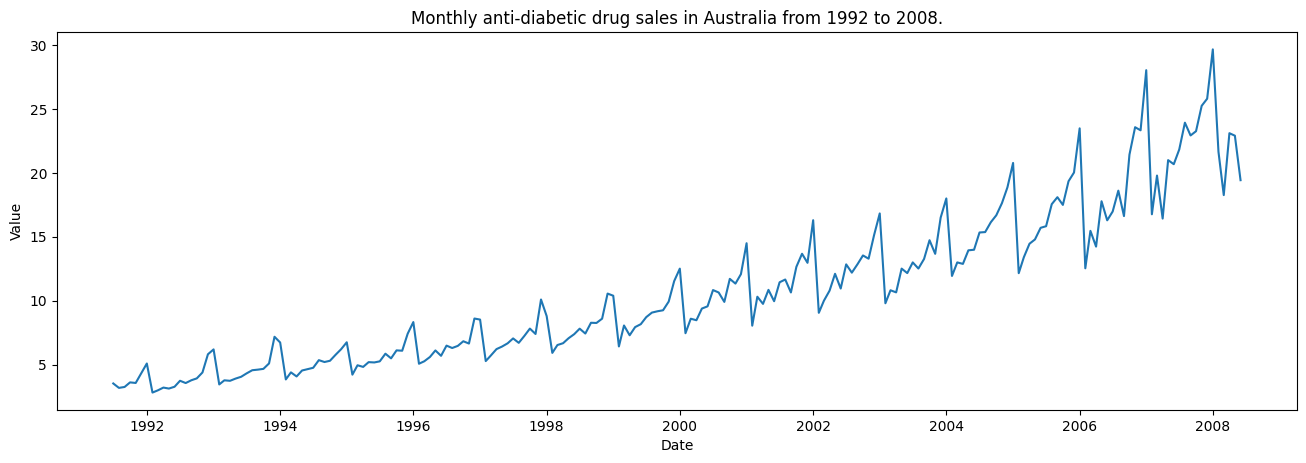

In [ ]:
# Time series data source: 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

Using another Time series dataset

In [ ]:
#Use this link to download the dataset
#https://github.com/DerrickKuria/datasets/blob/master/AirPassengers.csv

air_passengers = pd.read_csv('/content/AirPassengers.csv',parse_dates=['date'])
x = air_passengers['date'].values
y1 = air_passengers['value'].values


In [ ]:
print ('\n Data Types:')
print (air_passengers.dtypes)


 Data Types:
date     datetime64[ns]
value             int64
dtype: object


In [ ]:
air_passengers.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
air_passengers.describe()

,value
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
air_passengers.max()

date     1960-12-01 00:00:00
value                    622
dtype: object

In [ ]:
air_passengers.min()

date     1949-01-01 00:00:00
value                    104
dtype: object

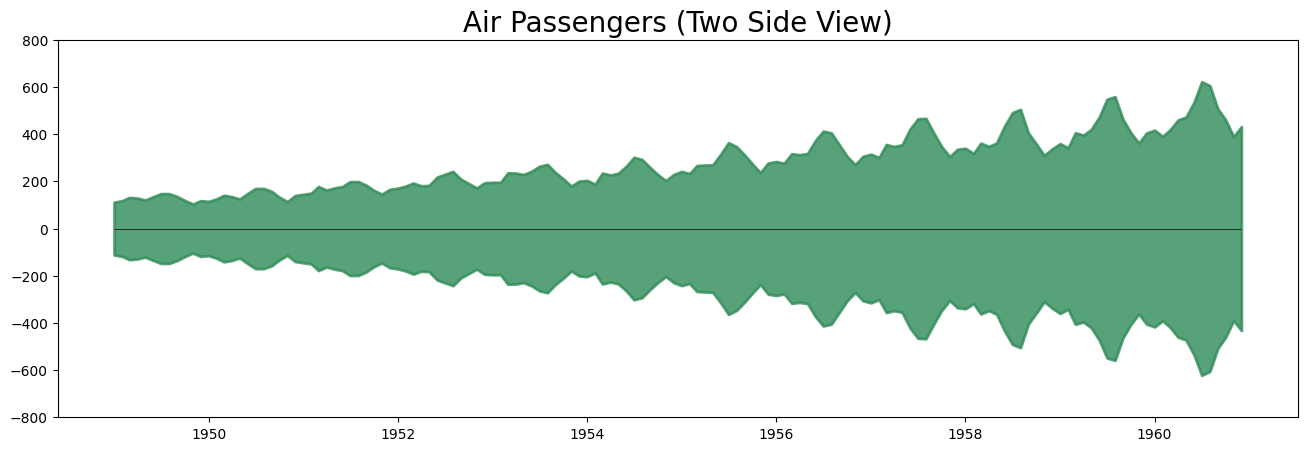

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 100)
plt.fill_between(x, y1=y1, y2=-(y1), alpha=0.8, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=20)
plt.hlines(y=0, xmin=np.min(air_passengers.date), xmax=np.max(air_passengers.date), linewidth=.5)
plt.show()

In [ ]:
 #The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
air_passenger = pd.read_csv('/content/AirPassengers.csv')
air_passenger

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
#Rename columns
air_passenger = air_passenger.rename(columns={'date':'month','value':'#Passengers'})
air_passenger.head()

,month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Let’s understand the arguments one by one:

* parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.

* index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.

* date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

In [ ]:
air_passenger.index

RangeIndex(start=0, stop=144, step=1)

In [ ]:
air_passenger.isnull().sum()

month          0
#Passengers    0
dtype: int64

In [ ]:
air_passenger.dtypes

month          object
#Passengers     int64
dtype: object

Since we want to perform time related actions on this data, we need to convert it to a datetime format before it can be useful to us. 

Let’s go ahead and do this using to_datetime() helper function.

In [ ]:
#air_passenger = pd.to_datetime(air_passenger['month'])
air_passenger.head()

,month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
air_passenger.head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: month, dtype: datetime64[ns]

We then set the month column to be index.

In [ ]:
type(air_passenger)

pandas.core.frame.DataFrame

In [ ]:
air_passenger = air_passenger.set_index('month')

In [ ]:
air_passenger.head()

,#Passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


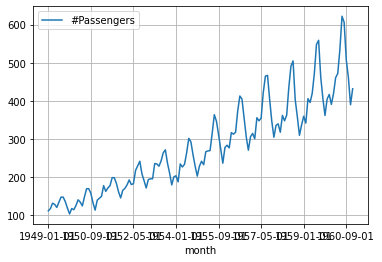

In [ ]:
air_passenger.plot(grid = True)

#5.Seasonal plot 

#6.Exponential Smoothing and ARIMA processes

Autoregressive Integrated Moving Average (ARIMA)

What Is an **Autoregressive Integrated Moving Average**?

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 

Understanding Autoregressive Integrated Moving Average (ARIMA)

An autoregressive integrated moving average model is a form of regression analysis that gauges the strength of one dependent variable relative to other changing variables.

 The model's goal is to predict future securities or financial market moves by examining the differences between values in the series instead of through actual values.


An ARIMA model can be understood by outlining each of its components as follows:

- Autoregression (AR) refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

- Integrated (I) represents the differencing of raw observations to allow for the time series to become stationary, i.e., data values are replaced by the difference between the data values and the previous values.

- Moving average (MA) incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each component functions as a parameter with a standard notation. 

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used. The parameters can be defined as:

p: the number of lag observations in the model; also known as the lag order.

d: the number of times that the raw observations are differenced; also known as the degree of differencing.

q: the size of the moving average window; also known as the order of the moving average.

In a linear regression model, for example, the number and type of terms are included.

 A 0 value, which can be used as a parameter, would mean that particular component should not be used in the model. This way, the ARIMA model can be constructed to perform the function of an ARMA model, or even simple AR, I, or MA models.

#7.Checking stationarity



**a.Plotting rolling Statistics**

**b.Augmented Dickey Fuller Test**

**c.Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)**

**a.Plotting rolling Statistics**

Plotting rolling means and variances is a first good way to visually inspect our series.

As we know that stationary time series don't have change mean or variance over time . So we can split equal length of data and compare mean or variance of the splitted data.

If the rolling statistics exhibit a clear trend (upwards or downwards) and show varying variance (increasing or decreasing amplitude), then you might conclude that the series is very likely not to be stationary.

In python , we can check easily characteristics of time series data by statmodels.tsa.seasonal module.

<Figure size 432x288 with 0 Axes>

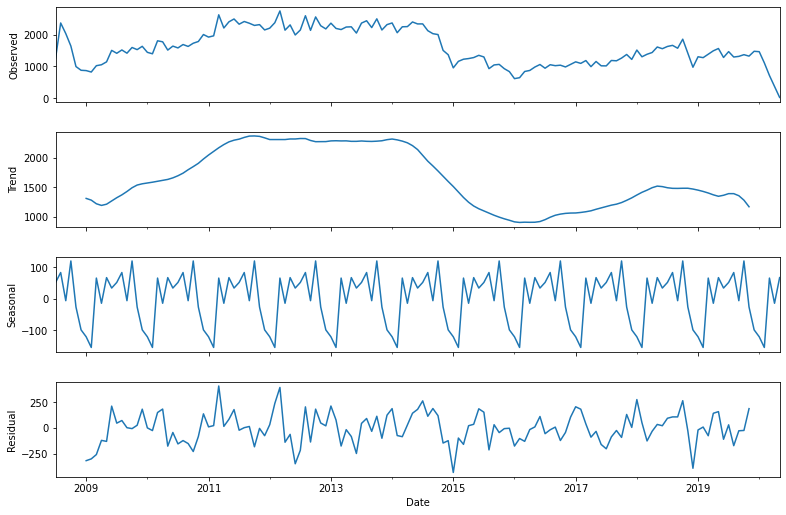

In [ ]:
# Time series data structure 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("BrentOilPrices.csv")
df['Date'] = pd.to_datetime(df.Date) # change datatype object to datetime
df.set_index('Date',inplace = True)  # set index as datetime # decompose of time series data
decompose  = seasonal_decompose(df.resample('M').sum(),freq=12)
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(12,8)

In [ ]:
# Time series stationary check
df = pd.read_csv("BrentOilPrices.csv")
df['Date'] = pd.to_datetime(df.Date) # change datatype object to datetime


In [ ]:
df.set_index('Date',inplace = True)  # set index as datetime
#taking half length of data
split = round(len(df['Price'])/2)
# split two part of time series data 
X1,X2 = df['Price'][0:split],df['Price'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()


In [ ]:
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))


To check Stationary 


Before difference mean and Variance

mean1 = 94.521844 ,mean2 = 58.985047
var1 = 507.628157 ,var2 = 249.172705


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


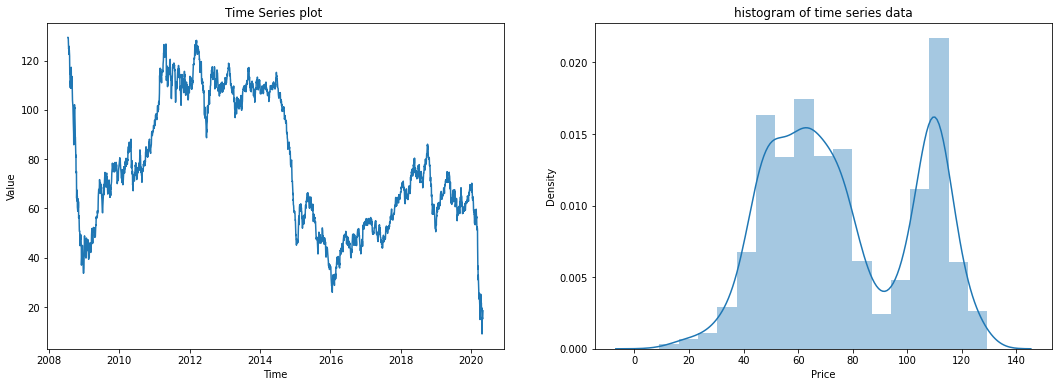

In [ ]:
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(df['Price'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(df['Price'],ax =ax[1])

After First differencing

In [ ]:
# Time series data after first difference 
df['first_diff'] = df.diff()
df.dropna(inplace = True)
df

,Price,first_diff
Date,,
2008-07-22,127.18,-2.16
2008-07-23,126.86,-0.32
2008-07-24,125.43,-1.43
2008-07-25,124.70,-0.73
2008-07-28,125.67,0.97
...,...,...
2020-04-27,15.17,-0.70
2020-04-28,15.60,0.43
2020-04-29,17.86,2.26


In [ ]:
#taking half length of data
split = round(len(df['first_diff'])/2)
# split two part of time series data 
X1,X2 = df['first_diff'][0:split],df['first_diff'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()


In [ ]:
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nAfter first difference\n")
print(f"mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))



To check Stationary 


After first difference

mean1 = -0.011206 ,mean2 = -0.063132
var1 = 2.816694 ,var2 = 1.704890


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


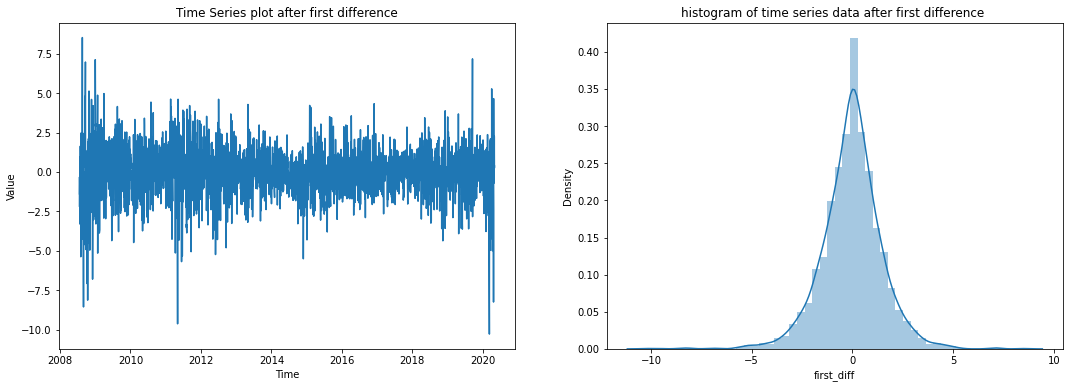

In [ ]:
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data after first difference ")
ax[0].plot(df['first_diff'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot after first difference")
sns.distplot(df['first_diff'],ax =ax[1])

In the first graph , we can notice trend , seasonal of time series data and there have also big different on mean and variance of the series.

 And after first differencing , they have very slightly different on mean and variance . So we can say second time series may be stationary 

**b.Augmented Dickey Fuller Test**

The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis.
It  is a common statistical test used to test whether a given Time series is stationary or not


---

 It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series. Stationary is very important factor on time series .


---




A **unit root** (also called a unit root process or a difference stationary process) is a stochastic trend in a time series, sometimes called a “random walk with drift”. 

i.e Unit root is a characteristic of a time series that makes it non-stationary.


---



The ADF test can handle more complex models than the Dickey-Fuller test, and it is also more powerful.



---



  .

 In ARIMA time series forecasting , the first step is to determine the number of differencing required to make the series stationary because model cannot forecast on non stationary time series data. 

**Hypotheses**

The hypotheses for the test:

The null hypothesis for this test is that there is a unit root.

The alternate hypothesis differs slightly according to which equation you’re using. 

The basic alternate is that the time series is stationary (or trend-stationary).

*Choosing Models and Lags:*

**Before you run an ADF test**, inspect your data to figure out an appropriate regression model.

 For example, a nonzero mean indicates the regression will have a constant term. The three basic regression models are:


 * No constant, no trend: 

    Δyt = γyt-1 + vt

* Constant, no trend:

    Δyt = α + γyt-1 + vt

* Constant and trend: 

    Δyt = α + γyt-1 + λt + vt



The Augmented Dickey Fuller adds lagged differences to these models:

To learn more about ADF , click  [here](https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/)

You need to choose a lag length to run the test.
 The lag length should be chosen so that the residuals aren’t serially correlated.
 
  You’ve got several options for choosing lags: 
  
 **Minimize Akaike’s information criterion (AIC)** or **Bayesian information criterion (BIC)**,
  or drop lags until the last lag is statistically significant.

We are going to use the BrentoilPrices.Csv. You can get the dataset in this github repository [here](https://github.com/liuxingzhi/BitCoinPrediction/find/28f641863f401816470783f37a06d98dde365c51)

In [ ]:
# Time series data structure 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
 #used to automatically decompose time series data in Python.
df = pd.read_csv("BrentOilPrices.csv")
df.head()

,Date,Price
0,18-Jul-08,129.34
1,21-Jul-08,129.34
2,22-Jul-08,127.18
3,23-Jul-08,126.86
4,24-Jul-08,125.43


<Figure size 432x288 with 0 Axes>

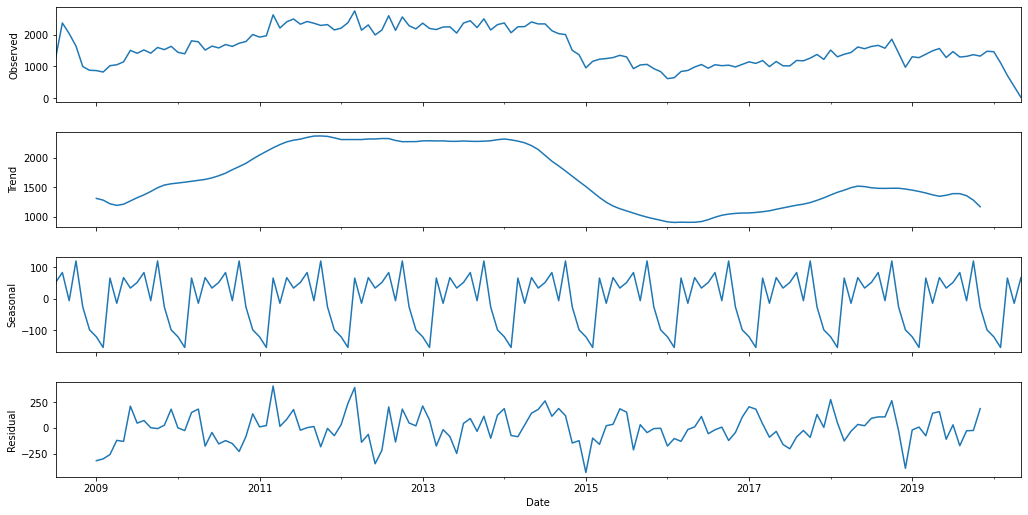

In [ ]:
df['Date'] = pd.to_datetime(df.Date) # change datatype object to datetime
df.set_index('Date',inplace = True)  # set index as datetime # decompose of time series data
decompose  = seasonal_decompose(df.resample('M').sum(),freq=12)
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(16,8)

In [ ]:
# ADF Test before differencing

from statsmodels.tsa.stattools import adfuller 
df_resample = df.resample('M').sum()
adf = adfuller(df_resample['Price'],12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -1.0187636528748651
p-value :  0.7463593213594673
# n_lags :  12
No of observation:  130
 critical value 1% : -3.4816817173418295
 critical value 5% : -2.8840418343195267
 critical value 10% : -2.578770059171598


Here, we noticed that statistic test value is greater than critical value and p-value is also greater than significant value(0.05). So we can say the time series is non-stationary.

In [ ]:
# ADF Test after differencing

from statsmodels.tsa.stattools import adfuller 
df_resample = df.resample('M').sum()
df_resample['first_diffprice'] = df_resample['Price'].diff() # first difference 
df_resample.dropna(inplace =True)
adf = adfuller(df_resample['first_diffprice'],12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -2.290668874077101
p-value :  0.174995108676464
# n_lags :  12
No of observation:  129
 critical value 1% : -3.482087964046026
 critical value 5% : -2.8842185101614626
 critical value 10% : -2.578864381347275


Now after first difference , we notice that statistic test and p-value are very low than critical value and significant value(0.05) respectively. So this is stationary .

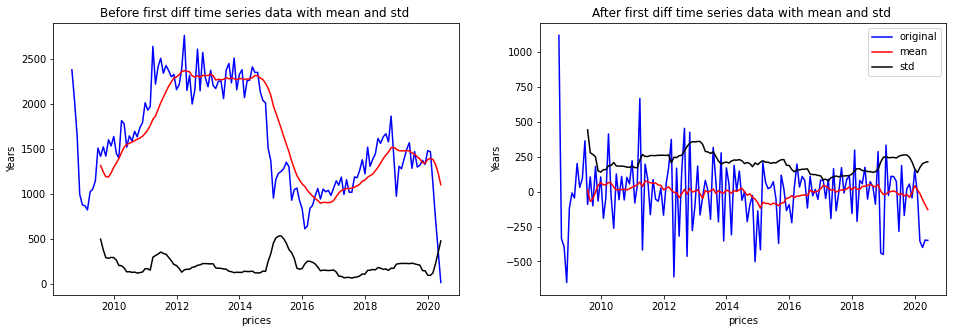

In [ ]:
# plot of time series data for ADF test
fig ,ax = plt.subplots(1,2,figsize=(16,5))
# mean ,std of before difference data 
mean1 = df_resample['Price'].rolling(12).mean()
std1 = df_resample['Price'].rolling(12).std()
ax[0].plot(df_resample['Price'],color ='blue',label = 'original')
ax[0].plot(mean1,color ='red',label = 'mean')
ax[0].plot(std1,color ='black',label = 'std')
ax[0].set_title("Before first diff time series data with mean and std ")
ax[0].set_xlabel("prices")
ax[0].set_ylabel("Years")
# mean ,std  after difference data 
mean2 = df_resample['first_diffprice'].rolling(12).mean()
std2 = df_resample['first_diffprice'].rolling(12).std()
ax[1].plot(df_resample['first_diffprice'],color ='blue',label = 'original')
ax[1].plot(mean2,color ='red',label = 'mean')
ax[1].plot(std2,color ='black',label = 'std')
ax[1].set_title("After first diff time series data with mean and std ")
ax[1].set_xlabel("prices")
ax[1].set_ylabel("Years")
plt.legend(loc ='best')


**c.Kwiatkowski–Phillips–Schmidt–Shin (KPSS)**

The **Kwiatkowski–Phillips–Schmidt–Shin (KPSS)** test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

KPSS test is a statistical test to check for stationarity of a series around a deterministic trend. 

Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series. 

However, it has couple of key differences compared to the ADF test in function and in practical usage. 

Therefore, is not safe to just use them interchangeably.

* The null hypothesis for the test is that the data is stationary.
* The alternate hypothesis for the test is that the data is not stationary.

Overview of How The Test is Run

The KPSS test is based on linear regression. It breaks up a series into three parts:

 a *deterministic trend* (βt),
  
a *random walk* (rt),

  and a *stationary error* (εt), 

with the regression equation:



> xt = rt + βt + εt



If the data is stationary, it will have a fixed element for an intercept or the series will be stationary around a fixed level . 

The test uses OLS find the equation, which differs slightly depending on whether you want to test for level stationarity or trend stationarity.

A simplified version, without the time trend component, is used to test level stationarity.

Data is normally log-transformed before running the KPSS test, to turn any exponential trends into linear ones.

In python, the **statsmodel** package provides a convenient implementation of the KPSS test.

A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary.

So practically, the interpretaion of p-value is just the opposite to each other.

That is, if p-value is < signif level (say 0.05), then the series is non-stationary. Whereas in ADF test, it would mean the tested series is stationary

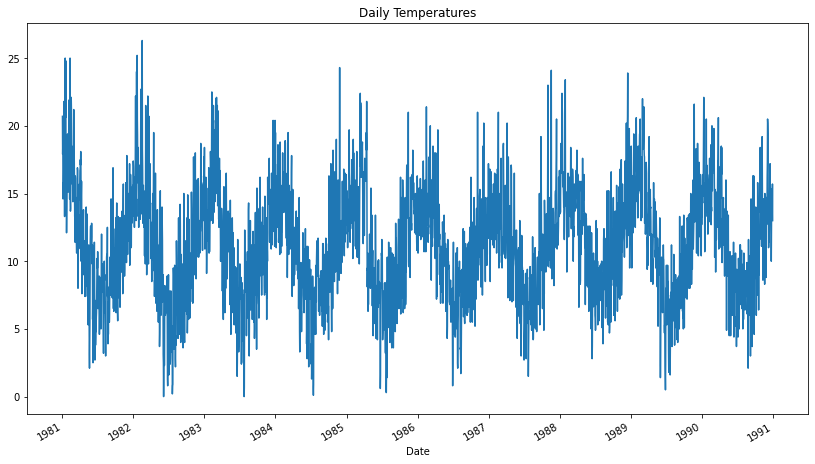

In [ ]:
import pandas as pd
import numpy as np
path = 'https://raw.githubusercontent.com/selva86/datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df.plot(title='Daily Temperatures', figsize=(14,8), legend=None);

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value


In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    
    return kpss_output

In [ ]:
kpss_test(df.Temp)

Results of KPSS Test:


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Test Statistic            0.06511
p-value                   0.10000
Lags Used                30.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64

The output of the KPSS test contains 4 things:

The KPSS statistic
p-value
Number of lags used by the test
Critical values
The p-value reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.

The KPSS statistic is the actual test statistic that is computed while performing the test. For more information no the formula, the references mentioned at the end should help.

In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value.

That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

Finally, the number of lags reported is the number of lags of the series that was actually used by the model equation of the kpss test. By default, the statsmodels kpss() uses the ‘legacy’ method. In legacy method, int(12 * (n / 100)**(1 / 4)) number of lags is included, where n is the length of the series.

#8.Autoregression

**Autoregression** is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

It is a very simple idea that can result in accurate forecasts on a range of time series problems.


yhat = b0 + b1*X1

Autocorrelation

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

This relationship between variables is called correlation.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags.

 The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.


 to read more check [here](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)

we will investigate the autocorrelation of a univariate time series then develop an autoregression model and use it to make predictions. 

Link to  [data](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv)

            Temp
Date            
01/01/1981  20.7
02/01/1981  17.9
03/01/1981  18.8
04/01/1981  14.6
05/01/1981  15.8


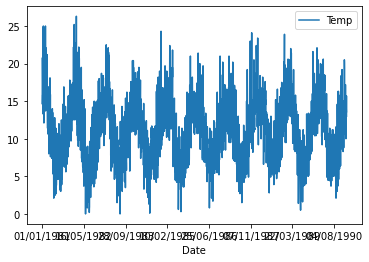

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/content/temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

Quick Check for Autocorrelation

There is a quick, visual check that we can do to see if there is an autocorrelation in our time series dataset.

Pandas provides a built-in plot to do exactly this, called the ***lag_plot()*** function.

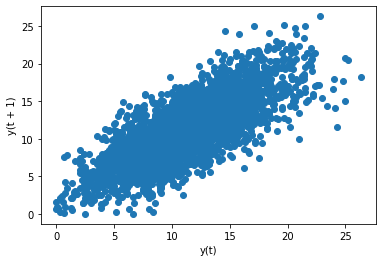

In [4]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

In [5]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('/content/temperatures.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


##Autocorrelation Plots

We can plot the correlation coefficient for each lag variable.

This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.


We could manually calculate the correlation values for each lag variable and plot the result. 

Thankfully, Pandas provides a built-in plot called the autocorrelation_plot() function.


The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. 

Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.



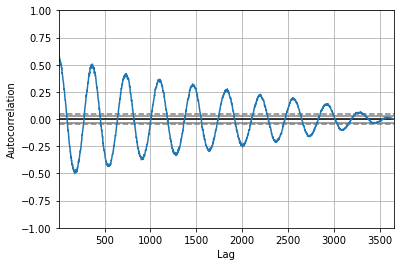

In [6]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

The statsmodels library also provides a version of the plot in the plot_acf() function as a line plot.



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


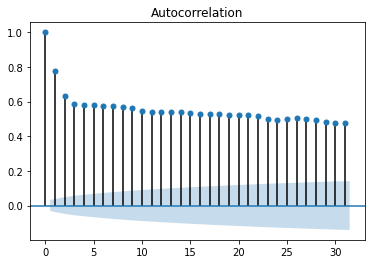

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)
pyplot.show()